**Pie Chart**

For this example I'm using the California housing data set from sci-kit learn library.  We'll look at the percentage of houses in Average Bedroom number categories.

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing()
cal_df = pd.DataFrame(data=np.c_[cal['data'], cal['target']], columns=list(cal['feature_names']) + ['target'])
# Now I round the Average Number of Bedrooms (for a block) to the neareat integer and 10+ bedrooms go in their own category
cal_df['AveRoomsRounded'] = cal_df['AveRooms'].round(decimals=0).astype(int)

# And now I categorize based on their range
cal_df.loc[cal_df.AveRoomsRounded > 9, 'AveRoomsBin'] = '+10'
cal_df.loc[(cal_df.AveRoomsRounded > 7) & (cal_df.AveRoomsRounded < 10), 'AveRoomsBin'] = '8-9'
cal_df.loc[(cal_df.AveRoomsRounded > 5) & (cal_df.AveRoomsRounded < 8), 'AveRoomsBin'] = '6-7'
cal_df.loc[(cal_df.AveRoomsRounded > 3) & (cal_df.AveRoomsRounded < 6), 'AveRoomsBin'] = '4-5'
cal_df.loc[cal_df.AveRoomsRounded < 4, 'AveRoomsBin'] = '<=3'

#Uncommment the print functions below to see more about the data
#print(cal_df['AveRoomsBin'].value_counts(normalize=True))
#print(cal_df['AveRoomsRounded'].value_counts(normalize=True))
#print(cal.DESCR) #good for any scikit learn dataset

cal_df_binned = cal_df['AveRoomsBin'].value_counts(normalize=True).rename_axis('AveRooms').reset_index(name='percentage')
print(cal_df_binned)

  AveRooms  percentage
0      4-5    0.535901
1      6-7    0.349516
2      <=3    0.057171
3      8-9    0.044816
4      +10    0.012597


Using FPDF and Matlotlip libraries to generate a pdf with the pie chart and an accompanying table

''

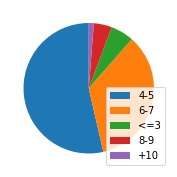

In [7]:
!pip install fpdf
from fpdf import FPDF
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
wedges, autotexts = ax.pie(cal_df_binned['percentage'], startangle=90)
plt.legend(wedges, cal_df_binned['AveRooms'], loc='lower right')
plt.savefig('cal_df_binned.png')

pdf=FPDF(format='letter')
pdf.add_page() #always needed
pdf.set_font('arial', 'B', 11)
pdf.cell(60)
pdf.cell(75, 10, 'California Housing Room Numbers per House', 0, 2, 'C')
pdf.cell(90, 10, '', 0, 2, 'C')

columnNameList = list(cal_df_binned.columns)
for header in columnNameList[:-1]:
  pdf.cell(35, 10, header, 1, 0, 'C')
pdf.cell(35, 10, columnNameList[-1], 1, 1, 'C')
pdf.set_font('arial', '', 11)

for i in range(0, len(cal_df_binned)):
  pdf.cell(60)
  pdf.cell(35, 10, cal_df_binned['AveRooms'][i], 1, 0, 'C')
  pdf.cell(35, 10, str(round(100 * cal_df_binned['percentage'][i], 2)), 1, 1, 'C')
pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(55, 10, '', 0, 0, 'C')

#insert chart
pdf.image('cal_df_binned.png', x = None, y = None, w=0, h=0, type='', link='')
pdf.output('cal_df_binned.pdf', 'F')

